![Slide1](Slide1.JPG)


# Introductions

## Introduction to article

I have a long history of working with data as a researcher and, despite my experience, I still have much to learn. I have discovered that sometimes traditional "textbook" data science solutions to problems in the real world are ineffective and require a more intuitive, logical, and hands-on approach, which I refer to as "Brute-Force Data Science." In this article, I will demonstrate how I employed this method to accurately predict the second wave of new Coronavirus cases in South Africa in 2020.

This case was relevant because we did not have suffient data to employ traditional "textbook" data science. I welcome your thoughts and feedback.

## Introduction to study

Thursday, March 5th, the National Institute for Communicable Diseases confirmed the [first case of the pandemic in South Africa](https://www.nicd.ac.za/first-case-of-covid-19-coronavirus-reported-in-sa/#:~:text=This%20morning%2C%20Thursday%20March%205,Africa%20on%20March%201%2C%202020.). During the month of May although a [national lockdown was implemented in March 26 through April 16 2020](https://www.sanews.gov.za/south-africa/president-ramaphosa-announces-nationwide-lockdown). The cases started rising exponentially until 25 July where it reached its turning point. During this period, it is where the country experienced the first wave of the pandemic. By wave we are referring to the when the number of cases of infected people started increasing to the point where it started decreasing. Given the fact that most countries that experienced the first wave before South Africa also experienced the second wave, it is probable that South Africa will also experience thereof. We predict that the second wave in South Africa will initiate early December with a Probability of 75%. When I speak collectively in this document, I am referring to the reader and I as we walk through this document “side by side” as this prediction was not done in a collective group or team.

# Synopsis

On 16 September, [President Cyril Ramaphosa announcement](https://www.thepresidency.gov.za/cabinet-statements/statement-virtual-cabinet-meeting-wednesday%2C-23-september-2020) relaxed the restrictions that were imposed during the lockdown to Alert Level 1. After a long period of the country enduring the painful lockdown, the nation was committed to doing whatever it took to ensure that they do not downgrade again to relapse to another hard lockdown that will not only hurt them again but the economy as well at large. So, the country entered a honeymoon phase where “everyone” adhered to the rules; people wore masks, sanitised, social distanced to list a few… Inevitably, we will see shortly that Social Science proves that human beings are bound to experience boredom in the presence of monotonous activities, and only a handful can embrace boredom. Consequently, most of the nation became “bored” and started resetting to their default states; the problem with this is that they relatively lost sight of the fact that the virus is still well and alive, making them complacent with the rules they once adhered to. Complacency could also possibly be a consequence of fatigue from restrictions and/or the number of new cases that had dropped and/or the summer season. As a result of boredom and complacent, more and more people started getting infected again, causing a second wave.

Following hereafter, we will quantify the scenario above and demonstrate why we expect the country to experience the second wave early December with a probability of 75% of it happening.

# Methodology

In this document, we will predict the date of the second wave of the pandemic in South Africa; we will do so using Sociology, "Data Science" to achieve our goal. We will start by giving introductions to all the fields thereof. Thereafter, we will proceed with our discussion following the content listed below:

- The Complacent Coefficient
- The Boredom Coefficient
- The Honeymoon Coefficient
- Predicting the Time
- Calculating the Probability
- Case study

We will use R and Tableau to compute our prediction.

## Sociology

In an article titled [The 4 Stages of Culture Shock](https://www.participatelearning.com/blog/the-4-stages-of-culture-shock/#:~:text=Culture%20shock%20generally%20moves%20through,frustration%2C%20adjustment%2C%20and%20acceptance.) (the author was not mentioned), we learned that the honeymoon phase is sociological and that in the honeymoon phase, the new choices we make always “seems like the greatest decision ever made, an exciting adventure to stay on forever.” But this does not last forever because naturally what follows thereafter is boredom. The point of the honeymoon in our context in that when the country dropped to Level 1, the country was in honeymoon as the vast majority were adhering to the rules required for the relaxation for the lockdown.

In his journal, [Henri Lefebvre and the ‘Sociology of Boredom’](https://journals.sagepub.com/doi/pdf/10.1177/0263276411417460), Michael E. Gardiner said “boredom was usually thought to be the result of nervous exhaustion or social overstimulation, often identified by the curious affliction then called ‘neurasthenia’, rather than a moral failing, the usual 18th-century response.” So, it is clear that boredom is naturally inevitable in the human behaviour. Boredom is applicable in our context because, at some stage, a good number of people got “bored” from adhering to the rule, which is inevitable as quoted above.

Thus we will incorporate both the honeymoon phase and the boredom in our model in the form of coefficients $H$ and $B$ respectively to build a mathematical model. The coefficients are used to quantify or represent the phases in the model

## "Data Science"

Here is where we do the bulk of the work to predict. We will use two datasets (South African New Cases and How Couples Meet and Stay Together 2017) and also build the models required to predict using data science. In this section, we will use the coefficient of the complacent $C$ as described above, and then use it to come up with the leading coefficient $d$ The leading coefficient is what will be used to predict the time we aim to achieve. We will also calculate a few statistics required for our model, but more importantly the probability that our prediction is accurate.


Let us proceed by calculating the coefficients.

# The Complacent Coefficient ($C$)

## Data analysis

We quantified complacent by first analysing the trend in the data of the confirmed cases in South Africa, this will assist us to establish a mathematical function that will permit us to reach our goal of quantifying the complacent. We are only interested in the trend of the first wave which spanned between 5 March 2020 to 25 July 2020 at the turning point since our goal is to predict the second wave, hence we ignored the trend after the turning point. Presented below is the trend of the daily new cases of of the virus:

In [1]:
# Start#Libraries
library(dplyr)
# library(sjlabelled)
library(readxl)
library(haven)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
dfi <- read_dta("HCMST 2017 fresh sample for public sharing draft v1.1.dta")
dfj <- read_excel("SA 1st Wave.xlsx")


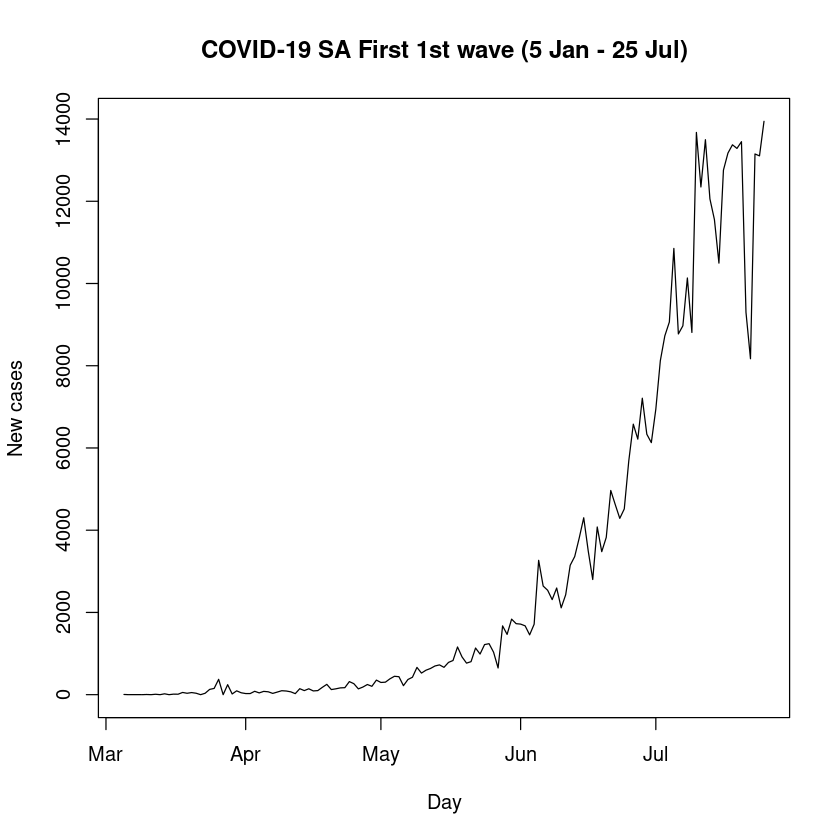

In [3]:
A <- dfj
attach(A)

# Replace 0s with 1 since log(0) = inf
ForLogA <- replace(A$New_cases, A$New_cases==0, 1)

# Model the trend line
exponential.model <- lm(log(ForLogA) ~ Date_reported)

# Plot the time series and trend line
Counts.exponential2 <- exp(predict(exponential.model,list(Time=Date_reported)))

plot(Date_reported, New_cases,pch=16, main = "COVID-19 SA First 1st wave (5 Jan - 25 Jul)", type = "l",
     xlab = "Day", ylab = "New cases")


## Finding the Coefficient $C$

Now that we have observed the trend, we will now fit the best model so that we can find the coefficient $C$ By observation, we can reasonably assume that the trend is exponential, so we will need to fit an exponential function

$$
	y = ae^{Ct} \quad \quad t=0,1,2,...,n
$$

And then we linearise it to get

$$
ln(y)=ln(a)+tln(C) \quad \quad \quad
y=New\quad Cases
\quad t=Day
\quad a=Scalar
$$

And then use it to fit in the data.

The result of the fit is presented graphically and gave us the coefficient $C$ which is $0.0540378$.

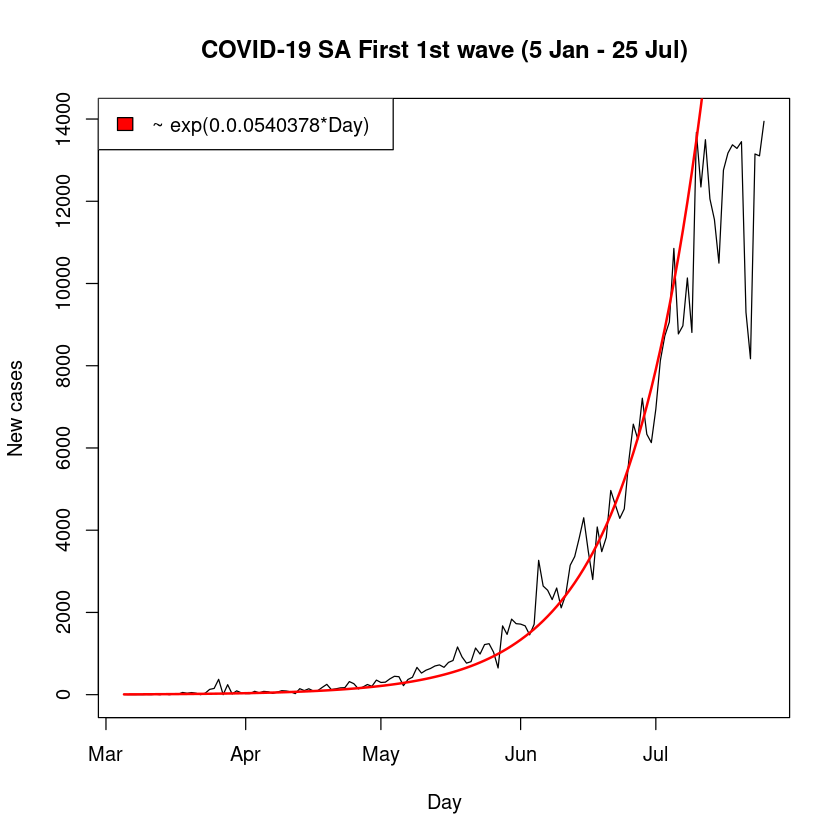

In [4]:
# Replace 0s with 1 since log(0) = inf
ForLogA <- replace(A$New_cases, A$New_cases==0, 1)

# Model the trend line
exponential.model <- lm(log(ForLogA) ~ Date_reported)

# Plot the time series and trend line
Counts.exponential2 <- exp(predict(exponential.model,list(Time=Date_reported)))

plot(Date_reported, New_cases,pch=16, main = "COVID-19 SA First 1st wave (5 Jan - 25 Jul)", type = "l",
     xlab = "Day", ylab = "New cases")
lines(Date_reported, Counts.exponential2,lwd=2, col = "red")
legend("topleft", c("~ exp(0.0.0540378*Day)"), fill = c("red"))

In [5]:
#Describe Model
summary(exponential.model)


Call:
lm(formula = log(ForLogA) ~ Date_reported)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2839 -0.1943  0.1122  0.4053  2.6969 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.085e+03  3.146e+01  -34.48   <2e-16 ***
Date_reported  6.862e-07  1.979e-08   34.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8441 on 141 degrees of freedom
Multiple R-squared:  0.895,	Adjusted R-squared:  0.8943 
F-statistic:  1202 on 1 and 141 DF,  p-value: < 2.2e-16


# The Boredom Coefficient ($B$)

## Data analysis

There are sufficiently many sociological scenarios that we can use to model boredom, however, the most practical and common thereof is that of romantic relationships. So to find the coefficient $B$, it was appropriate to assume that boredom in a romantic relationship is when a couple break up – the assumption here is that the reason for the break up was a consequence of boredom. We managed to find raw data from a report conducted by Stanford University (How Couples Meet and Stay Together 2017). Since the data was comprehensive with many variables, we only considered and isolated the variables we needed, which were:

In [6]:
dictionary <- data.frame(Variable = c("w6_q21b_year", "w6_q21e_year", "w6_q21b_month", "w6_q21e_month"),
Label = c("year subject began romantic relationship w partner",
"year of breakup",
"month subject began romantic relationship w partner",
"month of breakup"))

dictionary

Variable,Label
<chr>,<chr>
w6_q21b_year,year subject began romantic relationship w partner
w6_q21e_year,year of breakup
w6_q21b_month,month subject began romantic relationship w partner
w6_q21e_month,month of breakup


Using this data, we could quantify $B$ by following the process below:

1. First we standardized the years and months in year; for example, June 2016 = 2016.5
2. And then we quantified how long a couple has been together by getting the difference between the time they began their relationship to the time they ended it
3. Since the South African COVID-19 confirmed data is presented in days, we also converted the boredom data in days
4. In the boredom data, we removed those who are still in the relationship and those who’s relationships did not last at all i.e. those with a value of zero.

The table below illustrates the data frame:

In [7]:
# Subset relevant variable
df <- dfi[, c("w6_q21b_year", "w6_q21b_month", "w6_q21e_year", "w6_q21e_month")]

#Convert year and month into year
df$mnth_in_yrs_b <- df$w6_q21b_year + df$w6_q21b_month/12
df$mnth_in_yrs_e <- df$w6_q21e_year + df$w6_q21e_month/12
df$lr_months <- ifelse(df$mnth_in_yrs_e - df$mnth_in_yrs_b < 0, 0,df$mnth_in_yrs_e - df$mnth_in_yrs_b)
df$lr_days <- df$lr_months/360

boredom_data <- subset(df, lr_days != 0)

head(boredom_data)

w6_q21b_year,w6_q21b_month,w6_q21e_year,w6_q21e_month,mnth_in_yrs_b,mnth_in_yrs_e,lr_months,lr_days
<dbl>,<dbl+lbl>,<dbl>,<dbl+lbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017,3,2017,6,2017.250,2017.500,0.25000000,0.0006944444
2013,4,2013,6,2013.333,2013.500,0.16666667,0.0004629630
2014,11,2016,4,2014.917,2016.333,1.41666667,0.0039351852
2017,6,2017,7,2017.500,2017.583,0.08333333,0.0002314815
2009,8,2013,10,2009.667,2013.833,4.16666667,0.0115740741
2005,5,2011,6,2005.417,2011.500,6.08333333,0.0168981481


**Dictionary:**

In [8]:
dictionary2 <- data.frame(Variable = c("w6_q21b_year", "w6_q21b_month", "w6_q21e_year", "w6_q21e_month", "mnth_in_yrs_b", "mnth_in_yrs_e", "lr_months", "lr_days"),
Description = c("Year relationship began",
"Month of year relationship began",
"Year relationship ended",
"Month of year relationship ended",
"Month in years relationship began",
"Month in years relationship ended",
"Length of relationship in years",
"Length of relationship in days"))
dictionary2

Variable,Description
<chr>,<chr>
w6_q21b_year,Year relationship began
w6_q21b_month,Month of year relationship began
w6_q21e_year,Year relationship ended
w6_q21e_month,Month of year relationship ended
mnth_in_yrs_b,Month in years relationship began
mnth_in_yrs_e,Month in years relationship ended
lr_months,Length of relationship in years
lr_days,Length of relationship in days


## Finding the coefficient $B$

To find the coefficient $B$, we first needed to remove all duplicates, and from there find the average of how long it took a couple to break up in year and make the average thereof the coefficient $B$. So $B$ is 0.0273693

In [9]:
# Finding the coefficient B
boredom_dt <- distinct(df, df$lr_days)
boredom_dt2 <- subset(boredom_dt, boredom_dt != 0)

summary(boredom_dt2)

   df$lr_days       
 Min.   :0.0002315  
 1st Qu.:0.0067708  
 Median :0.0168982  
 Mean   :0.0273693  
 3rd Qu.:0.0422454  
 Max.   :0.1453704  

# The Honeymoon Coefficient ($H$)

As described above, the Honeymoon phase is when the majority of the people adhered to the rules that were put in place to minimise the spread of the virus. The Honeymoon coefficient was rather difficult to find raw data for analysis, so the best we could do was to find already analysed data and use it in our model. In his article on the website “[The Date Mix](https://www.zoosk.com/date-mix/)”, Alex Bocknek observed that the honeymoon phase spans between 6 to 12 months. Given this information, it was appropriate for us to take the average thereof and convert it to days which ended up being 0.025 year. Thus, the coefficient $H$ is 0.025.

# Predicting The Time

## Prediction Model

In order to predict when should we expect the second wave, we first had to see if we could use existing and established mathematics or build one from scratch. Since the first wave followed an exponential function, as we have established above, it is only appropriate that we use some components of the first wave’s behaviour to estimate the second wave. Thus the function and parameter we will use is

$$
	f(t) = \frac{y}{a} \quad\quad t=0,1,2,...,n
$$

$f(t)$, in this case, will incorporate more coefficients that $C$ alone, the leading coefficient $d$ which we will formally introduce below.

We should notice that the function does not have a scalar, this is because the number of new cases confirmed in this case is irrelevant since we are predicting time – it will be clear when we run the prediction graphically later on.

In this function, what we are interested in is the coefficient of $t$ because this will tell us how the curve will behave, and once we know how the curve behaves, we can predict the inception of the second wave. We have already mentioned that the leading coefficient is when we remove the honeymoon phase from complacent and boredom; this leading coefficient, in this case, is $d$, hence the coefficient of $t$ is

$$
	d=C+B−H \quad\quad 0<d<1
$$

Should this model be replicated, $C$ is the only coefficient that will be variable since $B$ and $H$ were derived with data making them constant as a consequence. So we can theorise $d$ by simplifying $B−H$ to, say, $M$, hence $M=0.0273693−0.025=0.0023693$ . Therefore, theoretically speaking

$$
d=C+M \quad\quad 0<d<1
$$


## Prediction Function

Now we will apply the above to predict the time we are interested in. We will start by quantifying the leading coefficient and then apply it to the modelling function and then visualise it which will allow us to reach our goal.

So let us calculate the leading coefficient. The leading coefficient is

$$
d=0.0540378+M=0.0564071
$$

Since the leading coefficient calculated above will be used to give us an estimate and not a definite time, to account for error we thought it is only appropriate to round it up since we want the curve to be as flat as possible to mimic the first wave, therefore the leading coefficient we will use is

$$
d=0.06
$$

Now that we have the leading coefficient, our final function will thus be

$$
f(t)=e^{0.06t} \quad\quad t=0,1,2,…,n
$$

Visually, it is presented as:

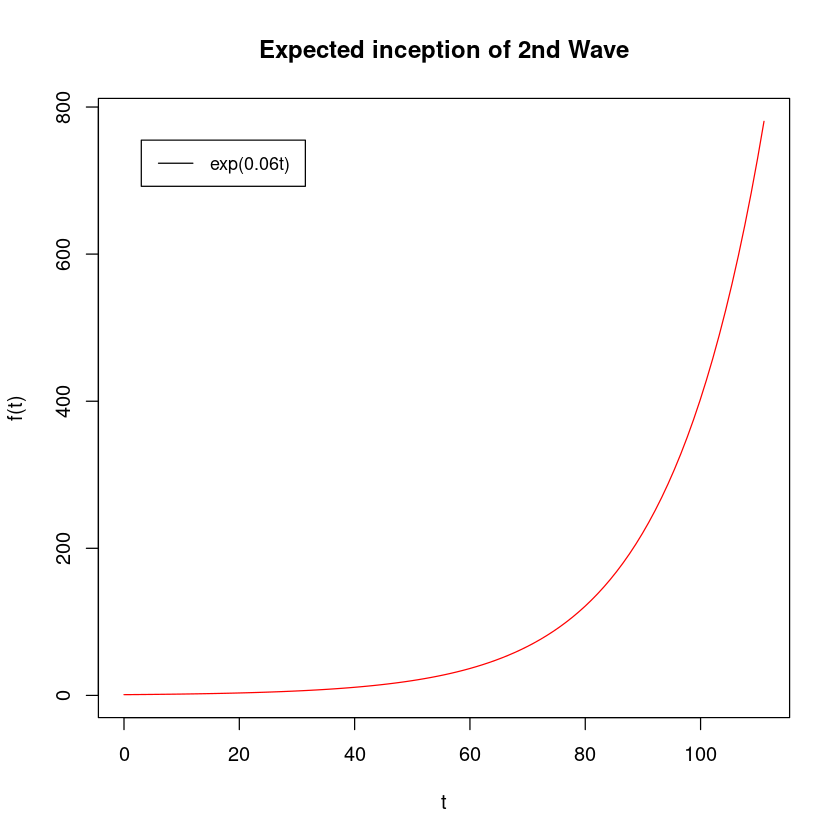

In [10]:
######################### Prediction graph ######################################
f <- function(x, d=0.06)exp(x*d)
f1 <- curve(f, from = 0, to = 111, xlab = "t",
            ylab = "f(t)", main = "Expected inception of 2nd Wave", col="red")


legend(3, 755, legend=c("exp(0.06t)"),
       col=c("black"), lty=1:2, cex=0.9)


## The Prediction

After the first wave, the country went to Level 1 on 21 September 2020, so it is appropriate to start our estimation there. From the 21st, we have been experiencing a constant number of cases, which is consistent with our model thus far. However, the increase thereof on the graph began on 26 November 2020 at day 66. We know that the virus has a window period of 14 days, hence we should expect the numbers rising significantly.The second wave here is defined as when there is an “abnormal” constant increase in the number of new cases as opposed to the constant trend of the number of new cases prior. Thus the second wave is expected to take effect around 10 December 2020 at day 80 (day 66 + 14 days) as demonstrated on the diagram below:

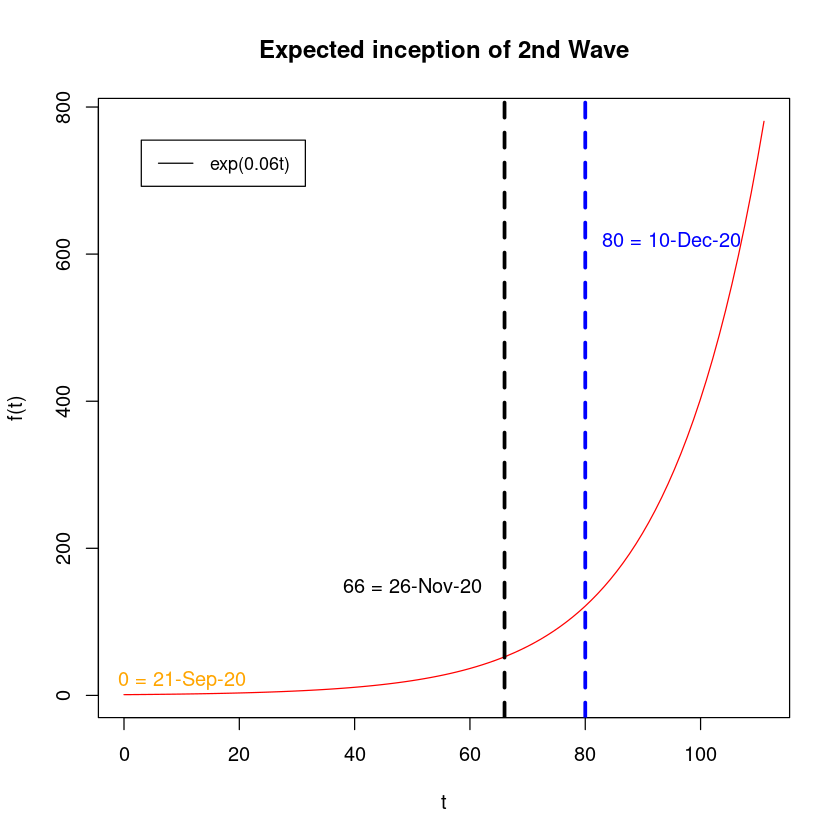

In [11]:
######################### Prediction graph ######################################

f <- function(x, d=0.06)exp(x*d)
f1 <- curve(f, from = 0, to = 111, xlab = "t",
            ylab = "f(t)", main = "Expected inception of 2nd Wave", col="red")

abline(v=80, col="blue",lwd=3, lty=2) #infection
abline(v=66, col="black",lwd=3, lty=2) #window period

text(95,620, "80 = 10-Dec-20", col = "blue") 
text(50,150, "66 = 26-Nov-20", col = "black")
text(10,20, "0 = 21-Sep-20", col = "orange") 

legend(3, 755, legend=c("exp(0.06t)"),
       col=c("black"), lty=1:2, cex=0.9)


# Calculating The Probability

## The Distribution

Given the graphs above, we have observed that the actual cases is discrete; however, the models fitted or used to predict are both continuous. Thus in order for us to appropriately calculate the probability, our distribution $X$ has to be continuous.

Since the exponential distribution is the probability distribution of the time between events or process in which events occur continuously and independently at a constant average rate $λ$, it is appropriate to apply it in this context. Thus


Let $X=$ Length of days before the second wave, then

$$
X∼exp(θ) \quad\quad  θ=\frac{1}{λ}
$$


## The Constant Average Rate ($λ$)

In quest of finding $λ$ we observed all the countries globally that experienced a second wave, we assessed the number of days it spanned not further than 27 September 2020, since that was the period our report was being conducted, and tabulated as below:

In [12]:
df3 <- data.frame(Country = c("Andorra", "Armenia", "Australia", "Austria", "Bahrain"),
Day_Start = c("2020-08-20", "2020-09-09", "2020-06-26", "2020-07-15", "2020-09-02"),
As_at_27_Sept = c("2020-09-27", "2020-09-27", "2020-08-06", "2020-09-27", "2020-09-27"),
Number_of_days_spanned = c(38, 18, 41, 74, 25))
df3

Country,Day_Start,As_at_27_Sept,Number_of_days_spanned
<chr>,<chr>,<chr>,<dbl>
Andorra,2020-08-20,2020-09-27,38
Armenia,2020-09-09,2020-09-27,18
Australia,2020-06-26,2020-08-06,41
Austria,2020-07-15,2020-09-27,74
Bahrain,2020-09-02,2020-09-27,25


|Min. | 1st Qu. | Median   | Mean | 3rd Qu.  |  Max. | n  
|----|---------|----------|------|----------|--------|----
|9.00 |  38.25  | 60.50  | 57.59  | 74.75 | 104.00 | 46

We have established already that $X∼exp(θ)$ then the probability density function is

$$
g(x)=θe^{−θx} , x≥0
$$

Since we are interested in finding the probability of the second wave to occur at a particular day; the appropriate probability function should then be

$$
P(0≤ X ≤ b) = \int_{0}^b θe^{θx}dx = 1-e^{-θb}
$$


The next step to do now is to quantify $θ$ and this is done as follows

$$
θ=\frac{1}{λ}=\frac{1}{57.59}=0.01736
$$

Now since our prediction is that we are expecting a second wave early December of which we quantified it to be in day 80 where day 0 was the announcement of Alert Level 1, the probability we want to find is the length of days in the trend line that elapsed until the inception of the second wave, day 80. Hence the probability that the second wave will occur early December is

$$
P(0≤X≤80)=1−e^{−0.01736×80}=0.75063
$$

Thus the probability that the second wave will take place early December is 75%, which is quite high to be taken lightly.

# Case Study
We ran the same module for the United States of America wherein their case $C=0.0280447$ and our prediction was also accurate. We are open to send you the details thereof at your request. Calculating the probability for the United States is only possible if we know the policies implemented to control the pandemic in their context.


# Conclusion
In this document, our goal was to predict when we can expect the second wave of the pandemic in South Africa using Data Science and Sociology. We estimated that the second wave will have its inception early December with a probability of 75%. We hope that this information will assist decision-makers in planning accordingly.